#### **1. Importing Required Package and Modules**

Installation of the necessary modules.

In [ ]:
%pip install seaborn
%pip install scikit-learn
%pip install matplotlib
%pip install aisp

In [6]:
# Importing the Artificial Immune Recognition System
from aisp.CSA import AIRS

# Importing other packages. 
import numpy as np
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

#### 2. Generating dice bubbles for classes randomly.

Using the make_blobs function, two sets of data are generated in the form of bubbles, in the range between 0 and 1, representing each class x and y. Then this data is separated into test and training sets.

In [8]:
# Generating the samples and outputs for the training.
samples, output = make_blobs(n_samples=500 , n_features=2, cluster_std=0.07, center_box=(0.0, 1.0), centers=[[0.25, 0.75], [0.75, 0.25]], random_state=1234) 
# Separating data for training and testing.
train_x, test_x, train_y, test_y = train_test_split(samples, output, test_size=0.2)

#### 3. Testing the model ``AIRS``:
Then, it presents the result of the forecast accuracy.

In [9]:
# Starting the class.
airs = AIRS(seed=1234)
# Carrying out the training:
airs.fit(X=train_x, y=train_y)
# Previewing classes with test samples.
prev_y = airs.predict(test_x)
# Showing the accuracy of predictions for data.
print(f"The accuracy is {accuracy_score(prev_y, test_y)}")
print(classification_report(test_y, prev_y))

✔ Set of memory cells for classes (0, 1) successfully generated:  ┇██████████┇ 400/400 memory cells for each aᵢ


The accuracy is 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        47

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



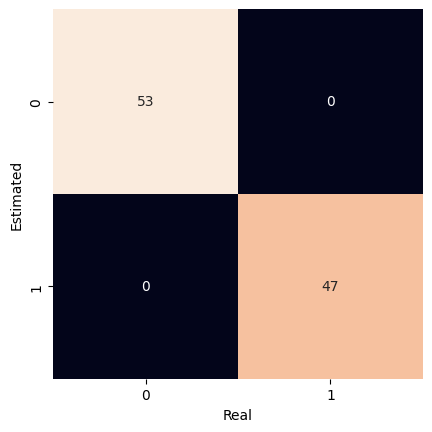

In [10]:
# Generating the confusion matrix and plotting it graphically.
mat = confusion_matrix(y_true=test_y, y_pred=prev_y)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=airs.classes, yticklabels=airs.classes)
plt.xlabel('Real')
plt.ylabel('Estimated')
plt.show()

#### 4. Detector and sample plotting:

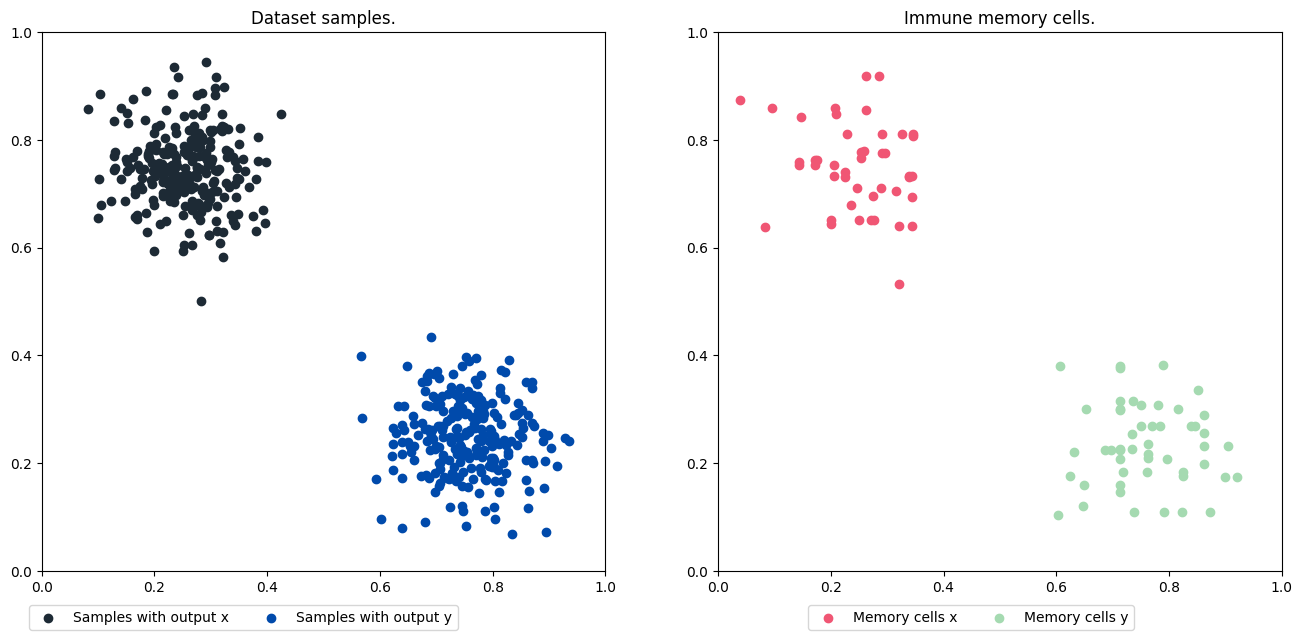

In [11]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(16, 7))
labels = ['x', 'y']
classesIndex = np.array((np.nonzero(output == 0)[0], np.nonzero(output == 1)[0]))

for i in range(2):
    ax[i].axis([0, 1, 0, 1])
    if i == 1:
        x = [cell.vector.tolist() for cell in airs.cells_memory[0]]
        y = [cell.vector.tolist() for cell in airs.cells_memory[1]]
        ax[i].scatter([point[0] for point in x], [point[1] for point in x], label='Memory cells x', color='#f05674')
        ax[i].scatter([point[0] for point in y], [point[1] for point in y], label='Memory cells y', color='#a5dab1')
        ax[i].set_title('Immune memory cells.')
    else:
        ax[i].scatter(samples[classesIndex[0], 0], samples[classesIndex[0], 1], label='Samples with output x', color='#1d2a35')
        ax[i].scatter(samples[classesIndex[1], 0], samples[classesIndex[1], 1], label='Samples with output y', color='#004aab')
        ax[i].set_title('Dataset samples.')

ax[1].legend(bbox_to_anchor=(0.75, -0.05), ncol=2)
ax[0].legend(bbox_to_anchor=(0.75, -0.05), ncol=2)

plt.show()